# Exemplo de "Bag of Visual Words"

Vocês estão recebendo este código do professor e devem dar o crédito devido, para que não se caracterize a situação de tentar passar esforço dos outros como sendo seu (a.k.a. plágio). Divirtam-se!

In [24]:
!pip install opencv-contrib-python
import cv2
import os
import os.path
import numpy as np
import math
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)


DATA_DIR = 'Assets//Data_Filtered_Resized'
CATEGORY_LIST = ['Alakazam', 'Aerodactyl']   #os.listdir(DATA_DIR)
NUM_IMAGES_TRAIN_PER_CATEGORY = 60
NUM_IMAGES_TEST_PER_CATEGORY = 20
NUM_CLUSTERS = 25

def get_images_from_category(category, num_train, num_test, data_dir):
    category_dir = os.path.join(DATA_DIR, category)
    num_total = num_train + num_test
    filenames_train = []
    filenames_test = []
    
    for k, filename in enumerate(os.listdir(category_dir)):
        if k < num_train:
            filenames_train.append(os.path.join(category_dir, filename))
        elif k < num_total:
            filenames_test.append(os.path.join(category_dir, filename))
        else:
            break
    return filenames_train, filenames_test

def get_images_from_category_list(category_list, num_train, num_test, data_dir):
    filenames_train_all = []
    target_train = []
    filenames_test_all = []
    target_test = []
    for category in category_list:
        filenames_train, filenames_test = get_images_from_category(category, num_train, num_test, data_dir)
        filenames_train_all.extend(filenames_train)
        target_train.extend([category] * NUM_IMAGES_TRAIN_PER_CATEGORY)
        filenames_test_all.extend(filenames_test)
        target_test.extend([category] * NUM_IMAGES_TEST_PER_CATEGORY)
    return filenames_train_all, filenames_test_all, target_train, target_test

def cria_vocabulario(imagens, num_clusters):
    km = cv2.BOWKMeansTrainer(num_clusters)
    akaze = cv2.KAZE_create()
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        mask = np.ones(img.shape)
        kp, desc = akaze.detectAndCompute(img, mask)
        km.add(desc)
    return km.cluster()

def representa(vocab, img):
    kaze = cv2.KAZE_create()
    kp = kaze.detect(img)
    bowdesc = cv2.BOWImgDescriptorExtractor(kaze, cv2.FlannBasedMatcher())
    bowdesc.setVocabulary(vocab)
    return bowdesc.compute(img, kp)

def transforma_imagens(imagens, vocab):
    X = []
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        X.append(representa(vocab, img).flatten())
    return np.array(X)

imagens_train, imagens_test, target_train, target_test = get_images_from_category_list(CATEGORY_LIST, 
                                                                                        NUM_IMAGES_TRAIN_PER_CATEGORY, 
                                                                                        NUM_IMAGES_TEST_PER_CATEGORY, 
                                                                                        DATA_DIR)
vocab = cria_vocabulario(imagens_train, NUM_CLUSTERS)
X_train = transforma_imagens(imagens_train, vocab)
X_test = transforma_imagens(imagens_test, vocab)
y_train = target_train
y_test = target_test

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators = 100)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)
scr = clf.score(X_test, y_test)

array([[0.06666667, 0.        , 0.075     , 0.09166667, 0.13333334,
        0.025     , 0.00833333, 0.025     , 0.        , 0.00833333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.025     , 0.01666667, 0.15      , 0.        , 0.06666667,
        0.13333334, 0.01666667, 0.        , 0.        , 0.15833335]],
      dtype=float32)

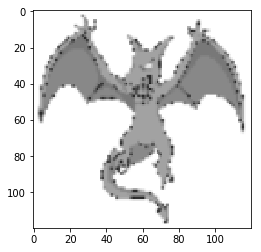

In [22]:
def show_example(path = "Testes/Testes/9.png", Plot = True):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, dsize=(120, 120))
    if Plot:
        plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)
    return representa(vocab, img_resized)

show_example()

## Análise Exploratória:

In [23]:
# origin_dir = 'Assets//Data_Filtered_Resized'
# Hist_Dict = {}
# for pkmn in os.listdir(origin_dir):
#     Hist_Dict[pkmn] = []
#     current_dir = os.path.join(origin_dir,pkmn)
#     for k, img in enumerate(os.listdir(current_dir)):
#         Hist_Dict[pkmn].append(show_example(os.path.join(current_dir,img), Plot = False))
print(Hist_Dict['Alakazam'])

[array([[0.0448718 , 0.00641026, 0.02564103, 0.00641026, 0.01282051,
        0.26923078, 0.01282051, 0.01282051, 0.02564103, 0.05128205,
        0.01923077, 0.01282051, 0.01923077, 0.02564103, 0.        ,
        0.06410257, 0.01282051, 0.0448718 , 0.02564103, 0.1923077 ,
        0.01282051, 0.00641026, 0.        , 0.        , 0.09615385]],
      dtype=float32), array([[0.01863354, 0.01863354, 0.01242236, 0.00621118, 0.01863354,
        0.39130434, 0.00621118, 0.01863354, 0.        , 0.0621118 ,
        0.00621118, 0.        , 0.        , 0.01863354, 0.        ,
        0.04968944, 0.        , 0.0621118 , 0.00621118, 0.21118012,
        0.00621118, 0.01242236, 0.        , 0.        , 0.07453416]],
      dtype=float32), array([[0.02926829, 0.02439024, 0.13170731, 0.0195122 , 0.0195122 ,
        0.22439024, 0.00487805, 0.        , 0.        , 0.04390244,
        0.03902439, 0.        , 0.        , 0.03414634, 0.        ,
        0.09756097, 0.07804878, 0.02439024, 0.0195122 , 0.05853659,

In [79]:
# for pkmn, matrix in Hist_Dict.items():
x = pd.Series(Hist_Dict['Alakazam']).mean()
x = pd.Series(x[0]).sort_values(ascending = False)
x

5     0.100112
19    0.092611
15    0.085315
24    0.067239
4     0.063297
17    0.059519
20    0.052180
1     0.049041
3     0.048567
13    0.048331
14    0.034985
9     0.034965
6     0.034055
21    0.033352
2     0.032993
18    0.032827
22    0.030896
23    0.022733
8     0.016147
0     0.013645
12    0.012510
10    0.010281
16    0.008587
7     0.007999
11    0.007813
dtype: float32

## Bibliografia:
- Modelo Bag of Visual Words produzido por Fábio Ayres.
- Dataset: [Pokémon Gen One](https://www.kaggle.com/thedagger/pokemon-generation-one/data) da plataforma Kaggle.com
